By Stewart Brehaut 

Using StackOverflow, consulting university forums and the user guides helped me with this project

## K-Nearest Neighbour Classification



In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Stuart\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Importing necessary modules

In [2]:
X_train = pd.read_table('train/X_train.txt',header = None,sep='\s+')
y_train = pd.read_table('train/y_train.txt',header = None,sep='\s+')
y_test = pd.read_table('test/y_test.txt',header = None,sep='\s+')
X_test = pd.read_table('test/X_test.txt',header = None,sep='\s+')

X_train, X_test and y_train, y_test data are imported as pandas dataframes.

In [3]:
y_train1 = np.ravel(y_train)

np.ravel had to be used on y_train in order to use for loop and perform KNN, y_train becomes y_train1 once ravel has been used

In [4]:
k_range = list(range(1, 51))
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    scores = cross_val_score(knn, X_train, y_train1, cv=10, scoring='f1_macro', n_jobs=-1)
    k_scores.append(scores.mean())
print(k_scores)

[0.89058272256825144, 0.87811466680830264, 0.90172482221590788, 0.90009628679531473, 0.90567685770258355, 0.90467998462389387, 0.90583824294291004, 0.90833015054799449, 0.90462365329351913, 0.90886778090608167, 0.90650457346675439, 0.90756297147124643, 0.90573675198025483, 0.90779060818700685, 0.90694705925721331, 0.9052217796744767, 0.90570109161707113, 0.90572965125413207, 0.90589469712524107, 0.90697709314419084, 0.90547837008266363, 0.90384508581592338, 0.90465777160509409, 0.90358386116220635, 0.90385494003178413, 0.90315365626902167, 0.90321990719143452, 0.90197229106299193, 0.90082581961256936, 0.90148308934036092, 0.90200148971267102, 0.90195580485286142, 0.90185550018365657, 0.90152841836237396, 0.90106794228732967, 0.90023266969540061, 0.90057287747440762, 0.90064993624055523, 0.90112191157115618, 0.90084012823626691, 0.89895939772281519, 0.90081169116488469, 0.89936908338746535, 0.89935934940293816, 0.89970866457405574, 0.89968776955524932, 0.89782335868627905, 0.89848234723

A for loop is used to find the best value of K with a cross fold validation/cv of 10, scoring is f1_macro as it is not binary.

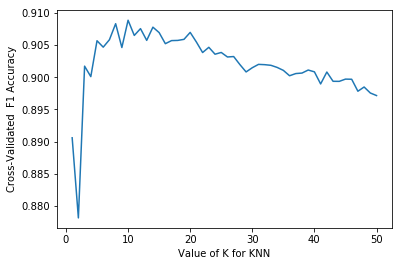

In [5]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated  F1 Accuracy')

In [6]:
knn_model = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
knn_model.fit(X_train, y_train1)

knn_acc_test = metrics.accuracy_score(y_test, knn_model.predict(X_test))
knn_f1_test = metrics.f1_score(y_test, knn_model.predict(X_test), average='weighted')

print "KNN Testing Accuracy: {}".format(knn_acc_test)
print "KNN F1 Score: {}".format(knn_f1_test)
print "- Confusion Matrix: "
print metrics.confusion_matrix(y_test, knn_model.predict(X_test))

KNN Testing Accuracy: 0.906684764167
KNN F1 Score: 0.90597818803
- Confusion Matrix: 
[[486   0  10   0   0   0]
 [ 36 431   4   0   0   0]
 [ 51  41 328   0   0   0]
 [  0   4   0 409  78   0]
 [  0   0   0  47 485   0]
 [  0   0   0   2   2 533]]


KNN classifier is used with the number of neighbors being 10, the Accuracy, F1 Score and Confusion matrix is printed.

#### Multiclass Logistic Regression with Elastic Net



In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.grid_search import GridSearchCV

C:\Users\Stuart\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Importing necessary modules

In [8]:
alpha_vals = [0.0001,0.0003,0.001,0.003,0.01,0.03]
l1_ratio_vals= [0,0.15,0.5,0.7,1]
sgd = SGDClassifier(loss='log', penalty='elasticnet', alpha= 0.0001, l1_ratio= 0, n_jobs=-1)
param_grid_sgd = dict(alpha=alpha_vals, l1_ratio=l1_ratio_vals)
print(param_grid_sgd)

{'l1_ratio': [0, 0.15, 0.5, 0.7, 1], 'alpha': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03]}


This save the alpha values and l1 ratio vals in a parameter dictionary so GridSearchCV will run the SGDClassifier with all the combinations calculating the mean f1 scores over 10 cross validations.

In [9]:
grid_sgd = GridSearchCV(sgd, param_grid_sgd, cv=10, scoring='f1_macro', n_jobs=-1)
grid_sgd.fit(X_train, y_train1)
print(grid_sgd.best_score_)
print(grid_sgd.best_params_)
print(grid_sgd.best_estimator_)

0.932504696685
{'alpha': 0.001, 'l1_ratio': 0.5}
SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.5, learning_rate='optimal',
       loss='log', n_iter=5, n_jobs=-1, penalty='elasticnet', power_t=0.5,
       random_state=None, shuffle=True, verbose=0, warm_start=False)


This performs the parameter search fitted to the data, then gives us the grid scores, also gives us the best grid score and parameters based on f1_macro.

In [10]:
grid_sgd.grid_scores_

[mean: 0.91151, std: 0.02732, params: {'alpha': 0.0001, 'l1_ratio': 0},
 mean: 0.91678, std: 0.05820, params: {'alpha': 0.0001, 'l1_ratio': 0.15},
 mean: 0.91936, std: 0.06343, params: {'alpha': 0.0001, 'l1_ratio': 0.5},
 mean: 0.92778, std: 0.05432, params: {'alpha': 0.0001, 'l1_ratio': 0.7},
 mean: 0.92831, std: 0.05021, params: {'alpha': 0.0001, 'l1_ratio': 1},
 mean: 0.90602, std: 0.05889, params: {'alpha': 0.0003, 'l1_ratio': 0},
 mean: 0.91589, std: 0.05725, params: {'alpha': 0.0003, 'l1_ratio': 0.15},
 mean: 0.92536, std: 0.05877, params: {'alpha': 0.0003, 'l1_ratio': 0.5},
 mean: 0.92848, std: 0.05388, params: {'alpha': 0.0003, 'l1_ratio': 0.7},
 mean: 0.92339, std: 0.05579, params: {'alpha': 0.0003, 'l1_ratio': 1},
 mean: 0.91314, std: 0.06006, params: {'alpha': 0.001, 'l1_ratio': 0},
 mean: 0.92234, std: 0.05085, params: {'alpha': 0.001, 'l1_ratio': 0.15},
 mean: 0.93250, std: 0.05752, params: {'alpha': 0.001, 'l1_ratio': 0.5},
 mean: 0.92973, std: 0.05659, params: {'alpha': 

This is all of the different scores. 

In [24]:
sgd_model = SGDClassifier(loss='log', penalty='elasticnet', alpha=0.001, l1_ratio=0.5, n_jobs=-1) 
sgd_model.fit(X_train, y_train1)
sgd_acc_test = metrics.accuracy_score(y_test, sgd_model.predict(X_test))
sgd_f1_test = metrics.f1_score(y_test, sgd_model.predict(X_test), average='macro')

print "SGD Model  Accuracy: {}".format(sgd_acc_test)
print "SGD F1 Score: {}".format(sgd_f1_test)
print "- Confusion Matrix: "
print metrics.confusion_matrix(y_test, sgd_model.predict(X_test))

SGD Model  Accuracy: 0.948422124194
SGD F1 Score: 0.9480832525
- Confusion Matrix: 
[[494   0   2   0   0   0]
 [ 25 438   7   1   0   0]
 [  8  12 397   0   3   0]
 [  0   3   0 413  75   0]
 [  1   0   0  15 516   0]
 [  0   0   0   0   0 537]]


Retraining model with best alpha and l1 ratio, f1 score, accuracy, and confusion matrix printed.

## Support Vector Machine (RBF Kernel)



In [12]:
from sklearn import svm 

gamma_vals = [1e-3,1e-4]
c_vals = [1, 10, 100, 1000]



Importing necessary module and creating gamme and c lists for parameter search

In [13]:
svm = svm.SVC(C=1, kernel='rbf', gamma=0.001)
param_grid_svm = dict(gamma=gamma_vals, C=c_vals)
print(param_grid_svm)  

{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}


Creating parameter dictionary and setting up svm model

In [14]:
grid_svm = GridSearchCV(svm, param_grid_svm, cv=10, scoring='f1_macro', n_jobs=-1)
grid_svm.fit(X_train, y_train1)
grid_svm.grid_scores_

[mean: 0.90619, std: 0.04429, params: {'C': 1, 'gamma': 0.001},
 mean: 0.79190, std: 0.04114, params: {'C': 1, 'gamma': 0.0001},
 mean: 0.94174, std: 0.04454, params: {'C': 10, 'gamma': 0.001},
 mean: 0.90637, std: 0.04472, params: {'C': 10, 'gamma': 0.0001},
 mean: 0.94860, std: 0.04531, params: {'C': 100, 'gamma': 0.001},
 mean: 0.94089, std: 0.04690, params: {'C': 100, 'gamma': 0.0001},
 mean: 0.95022, std: 0.04471, params: {'C': 1000, 'gamma': 0.001},
 mean: 0.94540, std: 0.04912, params: {'C': 1000, 'gamma': 0.0001}]

Performing parameter search fitted to data, printing grid scores.

In [15]:
print(grid_svm.best_score_)
print(grid_svm.best_params_)
print(grid_svm.best_estimator_)

0.95021900486
{'C': 1000, 'gamma': 0.001}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Best score and gamme and C printed

In [18]:
from sklearn import svm 
svm_model = svm.SVC(C=1000, kernel='rbf', gamma=0.001)
svm_model.fit(X_train, y_train1)
svm_acc_test = metrics.accuracy_score(y_test, svm_model.predict(X_test))
svm_f1_test = metrics.f1_score(y_test, svm_model.predict(X_test), average='macro')
print "SVM Model  Accuracy: {}".format(svm_acc_test)
print "SVM F1 Score: {}".format(svm_f1_test)
print "- Confusion Matrix: "
print metrics.confusion_matrix(y_test, svm_model.predict(X_test))

SVM Model  Accuracy: 0.965727858839
SVM F1 Score: 0.965767519546
- Confusion Matrix: 
[[493   0   3   0   0   0]
 [ 17 454   0   0   0   0]
 [  4  10 406   0   0   0]
 [  0   2   0 436  53   0]
 [  0   0   0  12 520   0]
 [  0   0   0   0   0 537]]


retraining model with best C and gamma, accuracy, f1score, and confusion matrix printed

## Random Forest



In [19]:
from sklearn.ensemble import RandomForestClassifier

tree_depth = [300, 500, 600]
tree_num = [200, 500, 700]

Importing necessary modules and saving tree depth and numbers

In [20]:
rfclf = RandomForestClassifier(n_estimators=300, max_depth=500, n_jobs=-1)
param_grid_rf = dict(n_estimators=tree_num, max_depth=tree_depth)
print(param_grid_rf)  

{'n_estimators': [200, 500, 700], 'max_depth': [300, 500, 600]}


Creating parameter dictionary and setting up RFC 

In [21]:
grid_rf = GridSearchCV(rfclf, param_grid_rf, cv=10, scoring='f1_macro', n_jobs=-1)
grid_rf.fit(X_train, y_train1)
grid_rf.grid_scores_

[mean: 0.92867, std: 0.04623, params: {'n_estimators': 200, 'max_depth': 300},
 mean: 0.92852, std: 0.04520, params: {'n_estimators': 500, 'max_depth': 300},
 mean: 0.92951, std: 0.04691, params: {'n_estimators': 700, 'max_depth': 300},
 mean: 0.92852, std: 0.04488, params: {'n_estimators': 200, 'max_depth': 500},
 mean: 0.92809, std: 0.04628, params: {'n_estimators': 500, 'max_depth': 500},
 mean: 0.92912, std: 0.04770, params: {'n_estimators': 700, 'max_depth': 500},
 mean: 0.92673, std: 0.04247, params: {'n_estimators': 200, 'max_depth': 600},
 mean: 0.92927, std: 0.04725, params: {'n_estimators': 500, 'max_depth': 600},
 mean: 0.92886, std: 0.04578, params: {'n_estimators': 700, 'max_depth': 600}]

Performing parameter search fitted to data, printing grid scores.

In [22]:
print(grid_rf.best_score_)
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)

0.929512823873
{'n_estimators': 700, 'max_depth': 300}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=300, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=700, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


Best score and tree depth and number based on f1 score printed 

In [25]:
rfclf = RandomForestClassifier(n_estimators=700, max_depth=300, n_jobs=-1)
rfclf.fit(X_train,y_train1)

rfclf_acc_test = metrics.accuracy_score(y_test, rfclf.predict(X_test))
rfclf_f1_test = metrics.f1_score(y_test, rfclf.predict(X_test), average='macro')

print "Random Forest Classifier Accuracy: {}".format(rfclf_acc_test)
print "RFC F1 Score: {}".format(rfclf_f1_test)
print "- Confusion Matrix: "
print metrics.confusion_matrix(y_test, rfclf.predict(X_test))

Random Forest Classifier Accuracy: 0.923990498812
RFC F1 Score: 0.9220223891
- Confusion Matrix: 
[[479  10   7   0   0   0]
 [ 34 430   7   0   0   0]
 [ 19  47 354   0   0   0]
 [  0   0   0 437  54   0]
 [  0   0   0  46 486   0]
 [  0   0   0   0   0 537]]


retraining model with best tree number and tree depth, accuracy, f1score, and confusion matrix printed

## Brief Discussion



The classification method that achieved the best performance was the Support Vector Machine with RBF Kernel, its f1 score and accuracy was the highest. SVM might have achieved the best performance because it had a better list of parameters to choose from. SVM could have performed better because Support Vector Machine models are good in high dimensional space. Also trades SVM off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly might have helped with performance.  The classification method which achieved the worst performance was the K nearest neighbour followed by random forest. The results in the dataset paper were an overall accuracy of 96% the SVM model I created achieved an accuracy of 96% or 96.5%, so it is possibile to achieve better results than what was in the dataset paper using an SVM with RBF kernel. The other classification methods achieved a worse accuracy than the results in the dataset paper. 

Suggestions to improve further model performance could include getting more data if possible, maybe pre processing and normalising data better. Could also use feature selection, and using random search to find best parameters or using more potential parameter combinations in GridSearch. Could also project data into a lower dimensional space, and possibily add more features or use less features. Could also try a different evaluation metric.